# Cardiovascular Disease Prediction using Machine Learning

Cardiovascular diseases are a major global health threat.  
Using machine learning, we can identify patients at high risk by analyzing clinical features such as age, cholesterol, blood pressure, ECG results, and more.

This notebook performs:

- Data preprocessing  
- Exploratory data analysis and visualizations  
- Correlation mapping  
- Comparison of ML algorithms  
- Selection of the best performing model  
- Feature importance analysis  

The goal is to build a reliable model to predict heart disease.

# Importing Libraries

We begin by importing all required Python libraries for:

- Data processing  
- Visualization  
- Machine learning  
- Evaluation metrics  

These tools form the backbone of our analysis and model development.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

sns.set(style="whitegrid")

# Loading the Dataset

The dataset consists of several medical attributes and a target variable indicating the presence or absence of heart disease.

We load the dataset and preview the first few rows to understand its structure.

In [9]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cardio_train.csv", sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Dataset Overview

Before modeling, we inspect:

- Dataset shape  
- Feature types  
- Missing values  

This helps us understand data quality and prepare preprocessing steps.

In [10]:
print("Dataset Shape:", df.shape)
df.info()
df.isnull().sum()

Dataset Shape: (70000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


# Data Preprocessing

Data preprocessing includes:

- Splitting features and target  
- Scaling numerical attributes using StandardScaler  
- Preparing data for machine learning models  

Scaling helps algorithms like SVM and KNN perform effectively.

In [11]:
X = df.drop('cardio', axis=1)
y = df['cardio']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Visualizations

Visualization helps uncover hidden patterns and relationships.

We will plot:
- Target class distribution  
- Age distribution  
- Cholesterol vs Age (scatter)  
- Correlation heatmap  

These visuals provide meaningful insights into our dataset.


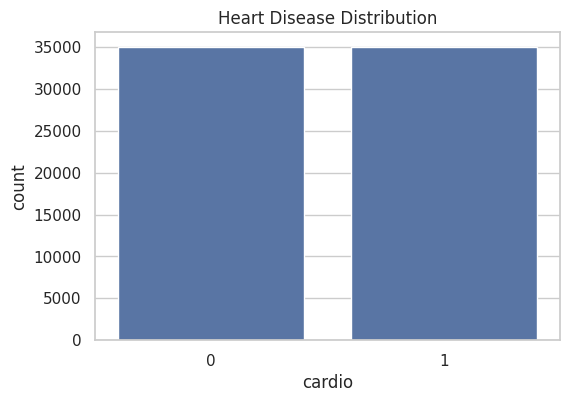

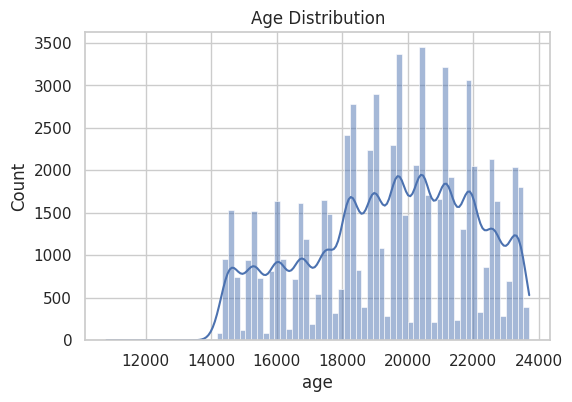

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='cardio', data=df)
plt.title("Heart Disease Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()

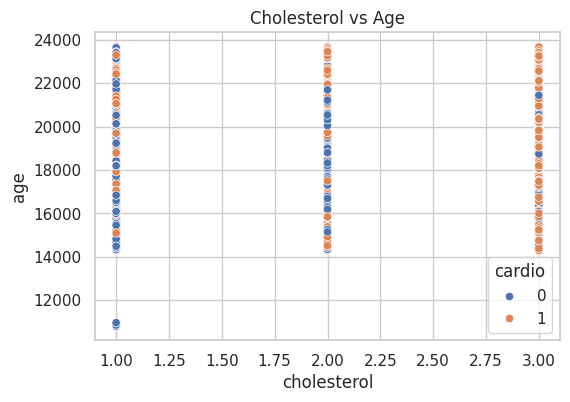

In [16]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='cholesterol', y='age', hue='cardio', data=df)
plt.title("Cholesterol vs Age")
plt.show()

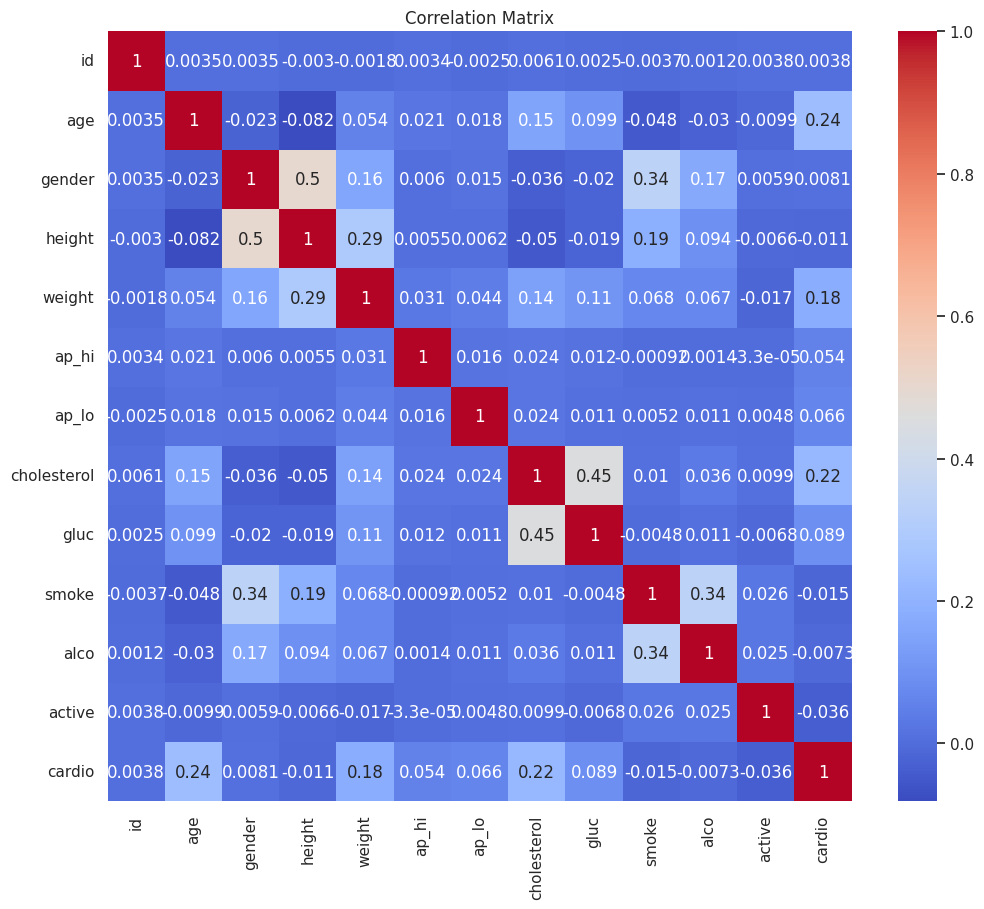

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Training Multiple Machine Learning Models

We train and evaluate the following algorithms:

- Logistic Regression  
- K-Nearest Neighbors (KNN)  
- Support Vector Machine (SVM)  
- Decision Tree  
- Random Forest  

Each model is tested on accuracy and detailed classification reports.

In [18]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

accuracy_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracy_results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))


Logistic Regression Accuracy: 0.7233
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      6988
           1       0.75      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.72      0.72     14000


KNN Accuracy: 0.6260
              precision    recall  f1-score   support

           0       0.62      0.64      0.63      6988
           1       0.63      0.61      0.62      7012

    accuracy                           0.63     14000
   macro avg       0.63      0.63      0.63     14000
weighted avg       0.63      0.63      0.63     14000


SVM Accuracy: 0.7299
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      6988
           1       0.75      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73   

# Comparing Model Accuracies

We identify the model with the highest accuracy.

Medical prediction focuses heavily on recall, but accuracy provides a strong initial benchmark.

In [19]:
print("\nMODEL ACCURACY COMPARISON")
for m, a in accuracy_results.items():
    print(f"{m}: {a:.4f}")

best = max(accuracy_results, key=accuracy_results.get)
print("\nBest Model:", best)


MODEL ACCURACY COMPARISON
Logistic Regression: 0.7233
KNN: 0.6260
SVM: 0.7299
Decision Tree: 0.6340
Random Forest: 0.7256

Best Model: SVM


# Final Model Selection

We re-train the best-performing model and evaluate it in detail.

If Random Forest is the best model, we also analyze which features contributed the most to predictions.

In [20]:
final_model = models[best]
final_model.fit(X_train, y_train)
final_preds = final_model.predict(X_test)

print("\nFINAL MODEL PERFORMANCE")
print(confusion_matrix(y_test, final_preds))
print(classification_report(y_test, final_preds))

if best == "Random Forest":
    importances = final_model.feature_importances_
    plt.figure(figsize=(10,6))
    sns.barplot(x=importances, y=X.columns)
    plt.title("Feature Importance (Random Forest)")
    plt.show()


FINAL MODEL PERFORMANCE
[[5324 1664]
 [2118 4894]]
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      6988
           1       0.75      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



# Conclusion

This project successfully:

- Explored and visualized the cardiovascular disease dataset  
- Trained multiple machine learning algorithms  
- Compared their performance  
- Selected the best model for prediction  
- Analyzed feature importance  

Machine learning proves to be a powerful tool in early detection of heart disease, helping improve medical decision-making and preventive care.